In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings("ignore")
%load_ext autotime

time: 0 ns


In [3]:
def true_func(X):
    return np.cos(1.5 * np.pi * X)

np.random.seed(0)
n_samples = 30
X = np.sort(np.random.rand(n_samples))
y = true_func(X) + np.random.randn(n_samples) * 0.1
print(y.shape)

(30,)
time: 312 ms




 degree 1의 regression coeffs
[-1.61]

 degree 1의 MSE 0.40772896250986834


 degree 4의 regression coeffs
[  0.47 -17.79  23.59  -7.26]

 degree 4의 MSE 0.04320874987231747


 degree 15의 regression coeffs
[-2.98295000e+03  1.03899930e+05 -1.87417069e+06  2.03717225e+07
 -1.44873988e+08  7.09318780e+08 -2.47066977e+09  6.24564048e+09
 -1.15677067e+10  1.56895696e+10 -1.54006776e+10  1.06457788e+10
 -4.91379977e+09  1.35920330e+09 -1.70381654e+08]

 degree 15의 MSE 182815433.47648773


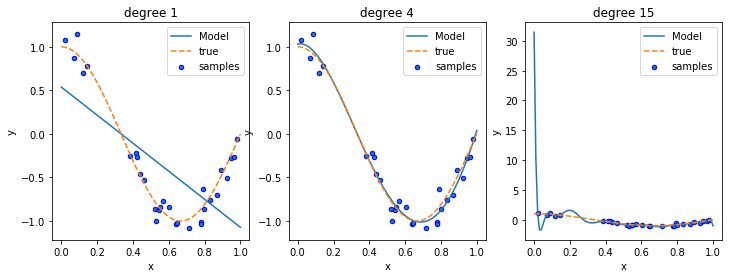

time: 641 ms


In [46]:
fig = plt.figure(figsize=(12,4))
degrees = [1, 4, 15]

for i in range(len(degrees)):
    ax = fig.add_subplot(1, len(degrees), i+1)
    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                        ("linear_regression", linear_regression)])
    pipeline.fit(X.reshape(-1, 1), y)
    
    scores = cross_val_score(pipeline, X.reshape(-1, 1), y,scoring="neg_mean_squared_error", cv =10)
    
    coeffs = pipeline.named_steps["linear_regression"].coef_
    print("\n\n degree {}의 regression coeffs\n{}".format(degrees[i], np.round(coeffs, 2)))
    print("\n degree {}의 MSE {}".format(degrees[i], -1 * np.mean(scores)))
    
    X_test = np.linspace(0, 1, 100)
    
    plt.plot(X_test, pipeline.predict(X_test[:,np.newaxis]), label="Model")
    plt.plot(X_test, true_func(X_test),"--", label="true")
    plt.scatter(X, y, edgecolors="b", s=20, label="samples")
    plt.title("degree {}".format(degrees[i]))
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend(loc="best")
